In [1]:
import data_transformer as transformer
from scipy.io import loadmat
from tqdm.auto import trange
from sklearn.model_selection import train_test_split

In [2]:
X, y = transformer.make_input_target()

Subject:   0%|          | 0/7 [00:00<?, ?it/s]

keep_interictal:   0%|          | 0/1006 [00:00<?, ?it/s]

keep_preictal:   0%|          | 0/1006 [00:00<?, ?it/s]

keep_interictal:   0%|          | 0/1542 [00:00<?, ?it/s]

keep_preictal:   0%|          | 0/1542 [00:00<?, ?it/s]

keep_interictal:   0%|          | 0/2419 [00:00<?, ?it/s]

keep_preictal:   0%|          | 0/2419 [00:00<?, ?it/s]

keep_interictal:   0%|          | 0/1891 [00:00<?, ?it/s]

keep_preictal:   0%|          | 0/1891 [00:00<?, ?it/s]

keep_interictal:   0%|          | 0/671 [00:00<?, ?it/s]

keep_preictal:   0%|          | 0/671 [00:00<?, ?it/s]

keep_interictal:   0%|          | 0/263 [00:00<?, ?it/s]

keep_preictal:   0%|          | 0/263 [00:00<?, ?it/s]

keep_interictal:   0%|          | 0/210 [00:00<?, ?it/s]

keep_preictal:   0%|          | 0/210 [00:00<?, ?it/s]

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
print('Training:', X_train.shape, y_train.shape)
print('Validation:', X_val.shape, y_val.shape)

Training: (2724,) (2724,)
Validation: (1343,) (1343,)


Dimension: (channel x micro-voltage)

In [14]:
def get_sig(mat):
    segment_name = list(mat.keys())[-1]
    segment = mat[segment_name]
    sig = segment['data'][0][0]
    return sig

In [69]:
def get_channels(mat):
    segment_name = list(mat.keys())[-1]
    segment = mat[segment_name]
    channels = segment['channels'][0][0][0]
    return channels

In [16]:
def get_fs(mat):
    "Returns the sampling frequency."
    segment_name = list(mat.keys())[-1]
    segment = mat[segment_name]
    fs = segment['sampling_frequency'][0][0][0][0]
    return fs

In [18]:
X_train_mat = []
for i in trange(len(X_train), desc='loadmat'):
    path = X_train[i]
    mat = loadmat(path)
    X_train_mat.append(mat)

loadmat:   0%|          | 0/2724 [00:00<?, ?it/s]

In [19]:
X_train_mat[0]

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Aug 21 01:00:00 2014',
 '__version__': '1.0',
 '__globals__': [],
 'interictal_segment_280': array([[(array([[ 60,  12,  60, ...,   2, -19,  30],
                [-33,  20, -36, ..., -47,  29, -18],
                [ 14,  14,  -3, ...,  12,  34,  16],
                ...,
                [-16,  58, -12, ..., -35,  28, -29],
                [-13,  -7,  27, ...,  29, -10,  -6],
                [-35,  -5, -15, ...,   1,  24,  28]], dtype=int16), array([[600]], dtype=uint16), array([[399.6097561]]), array([[array(['NVC0905_22_004_Ecog_c001'], dtype='<U24'),
                 array(['NVC0905_22_004_Ecog_c002'], dtype='<U24'),
                 array(['NVC0905_22_004_Ecog_c003'], dtype='<U24'),
                 array(['NVC0905_22_004_Ecog_c005'], dtype='<U24'),
                 array(['NVC0905_22_004_Ecog_c006'], dtype='<U24'),
                 array(['NVC0905_22_004_Ecog_c007'], dtype='<U24'),
                 array(['NVC

In [20]:
len(X_train_mat)

2724

In [21]:
get_channels(X_train_mat[0]).shape

(15,)

In [22]:
get_sig(X_train_mat[0]).shape

(15, 239766)

In [23]:
fs = get_fs(X_train_mat[0])

In [24]:
import numpy as np

In [25]:
N = get_sig(X_train_mat[0]).shape[1]
t = np.arange(0, N) / fs

In [26]:
import matplotlib.pyplot as plt

In [27]:
sig = get_sig(X_train_mat[0])
sig[14].shape

(239766,)

Single channel plot

Text(0, 0.5, '$\\mu V$')

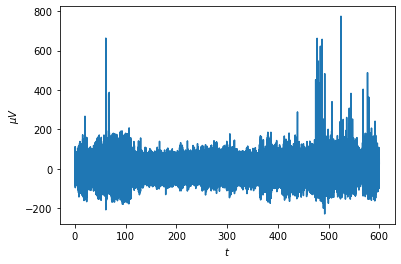

In [28]:
fig, ax = plt.subplots()
ax.plot(t, sig[14])
ax.set_xlabel('$t$')
ax.set_ylabel('$\mu V$')

All channels plot.

Text(21.200000000000003, 0.5, '$\\mu V$')

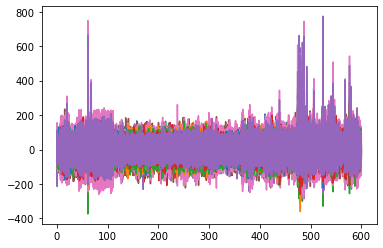

In [29]:
plt.plot(t, sig.T)
ax.set_xlabel('$t$')
ax.set_ylabel('$\mu V$')

In [30]:
from matplotlib.collections import LineCollection

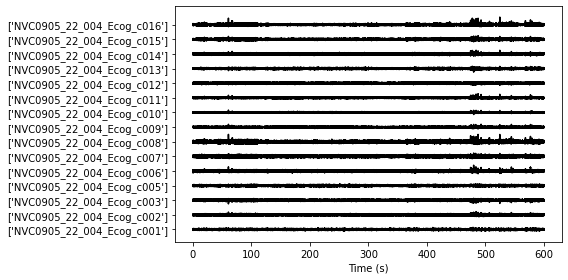

In [31]:
vspace=1500
bases = vspace * np.arange(15)
EEG = sig.T + bases
plt.figure(figsize=(8,4))
plt.plot(t, EEG, color='k')
plt.gca().yaxis.set_ticks(bases)
plt.gca().yaxis.set_ticklabels(get_channels(mat))
plt.xlabel('Time (s)')

plt.tight_layout()
plt.savefig('images/Dog_5_interictal_segment_0280.png')

In [65]:
def plot_eeg(mat, size_horizontal=8, size_vertical=4):
    segment_name = list(mat.keys())[-1]
    segment = mat[segment_name]
    sig = segment['data'][0][0]
    ch = segment['channels'][0][0][0]
    N = sig.shape[1]
    fs = segment['sampling_frequency'][0][0][0][0]
    t = np.arange(0, N) / fs
    vspace = 1500
    bases = vspace * np.arange(ch.shape[0])
    EEG = sig.T + bases
    plt.figure(figsize=(size_horizontal, size_vertical))
    plt.plot(t, EEG, color='k')
    plt.gca().yaxis.set_ticks(bases)
    plt.gca().yaxis.set_ticklabels(ch)
    plt.xlabel('Time (s)')
    plt.tight_layout()

It appears this file has a signal recorded with a missing channel label. Discard?

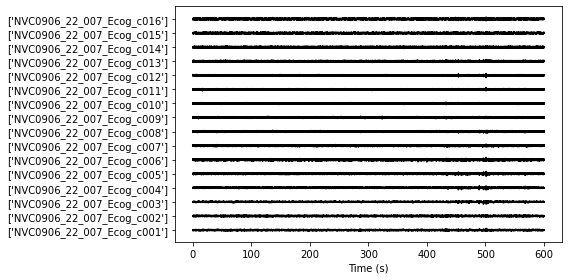

In [68]:
plot_eeg(X_train_mat[500])

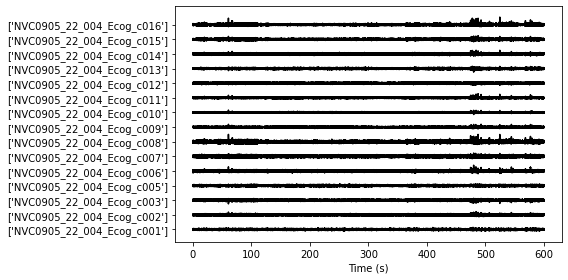

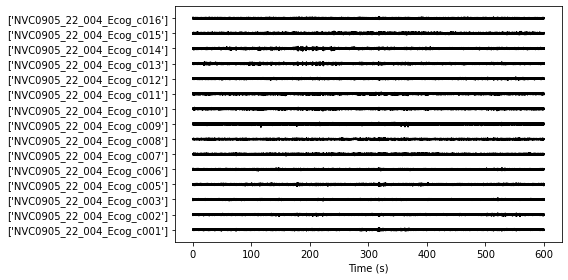

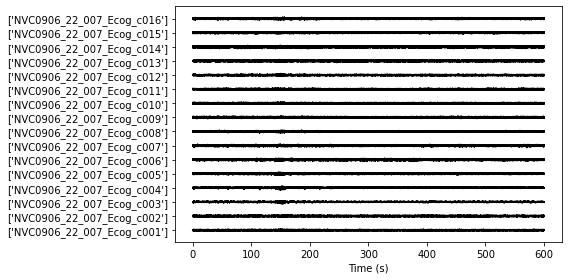

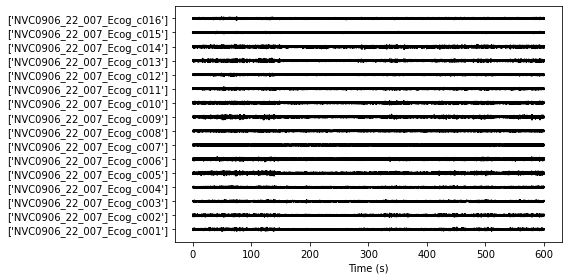

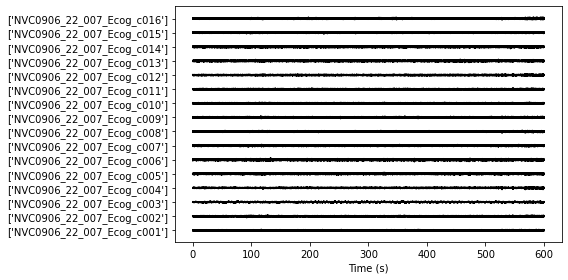

In [67]:
for i in range(5):
    plot_eeg(X_train_mat[i])